<a href="https://colab.research.google.com/github/ro1238b/CODSOFT/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the iris data set
Iris_f =pd.read_csv('/content/sample_data/IRIS.csv')

In [3]:
#Retrieves the first five rows of the data set
Iris_f.head() # check all the data loaded correctly

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Retrieves the last five rows of the data set
Iris_f.tail() #check all the data loaded correctly

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#Load the Descriptive Statistics for the DataFrame
Iris_f.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#count the  number of occurrences of each unique vlaue in the species column
Iris=Iris_f['species'].value_counts()
print(Iris)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [7]:
#Identify number of misiisng values in the dataset
Iris_f.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
#Now change the categorical value of species into numerical value
Iris_f['species']=Iris_f['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

**Data Visualize**

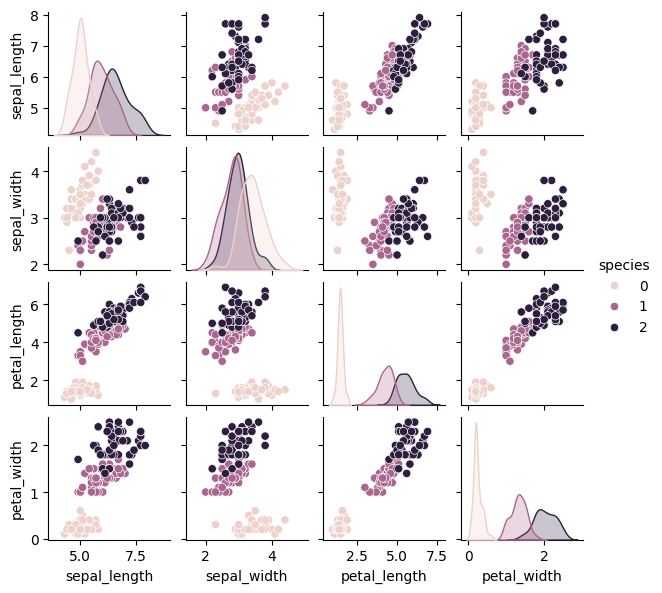

In [9]:
#Create a pair plot of DataFrame using seaborn
sns.pairplot(Iris_f, hue="species",height=1.5)
plt.show()

**Train-Test split**

In [10]:
#Define the features and target
X=Iris_f.drop('species',axis=1)
Y=Iris_f['species']

In [11]:
print(X.shape)

(150, 4)


In [12]:
print(Y.shape)

(150,)


In [13]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=18)

**Modeling and Training**

In [14]:
#Used Decision tree classifier to train the data
clf=DecisionTreeClassifier(random_state=14) #initialize the classifier
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=14)

In [15]:
#Uesd to prediction
Y_prediction=clf.predict(X_test)

In [16]:
#Calculating the accuracy of the prediction
accuracy=accuracy_score(Y_test,Y_prediction)
print(accuracy*100)

96.66666666666667


In [17]:
#classification report
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [18]:
Iris_f[49:51]

,sepal_length,sepal_width,petal_length,petal_width,species
49,5.0,3.3,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1


**Check the Model**

In [19]:
new_data= pd.DataFrame({'sepal_length':[6.0],'sepal_width':[3.25],'petal_length':[1.9],'petal_width':[0.4]})
prediction=clf.predict(new_data)
prediction[0]

0

In [20]:
#precdict the SPECIES name
if(prediction[0]==0):
  print("Iris-setosa")
elif(prediction[0]==1):
  print("Iris-versicolor")
else:
  print("Iris-virginica")

Iris-setosa
